# Курсовая работа

Подключим неоходимое для работы:

In [6]:
import math
from math import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import filterpy
from filterpy.kalman import KalmanFilter
from filterpy.common import Q_continuous_white_noise
from filterpy.common import Q_discrete_white_noise
#import code.book_plots as bp
from scipy import stats
from filterpy.common import van_loan_discretization
from scipy.linalg import expm
%matplotlib inline

Переведём данные в удобный для работы формат и далее сохраним их в пикл (чтобы можно было быстро работать с этой структурой данных):

In [15]:
def CNFparser(filename):
    '''
    Тут мы расписываем парсер
    CNFnav - кусок для работы в режиме навигации
    CNFalign - кусок для выставки (причём секунд 10-20 из него для алгебраической, остальное на кинематику)
    '''
    CNFnames = ['Time','AccX','AccY','AccZ','OmX','OmY','OmZ']
    CNF = pd.read_table(filename, sep = '\s+' ,header = None, names = CNFnames)
    #CNFalign = CNF[CNF.FlagAlignment == 1]
    #CNFalign = CNFalign.loc[:,['Time','OmX','OmY','OmZ','AccX','AccY','AccZ']]
    #CNFnav = CNF[CNF.FlagAlignment == 0]
    #CNFnav = CNFnav.loc[:,['Time','OmX','OmY','OmZ','AccX','AccY','AccZ']]
    #CNF = []
    CNF['Invariant'] = CNF.AccX*CNF.OmX +  CNF.AccY*CNF.OmY +  CNF.AccZ*CNF.OmZ
    CNF['g\''] = (CNF.AccX**2 + CNF.AccY**2 + CNF.AccZ**2)**(0.5)
    CNF['W_Std500'] = (CNF.Invariant.rolling(window = 500, center = False).std()).dropna()
    return CNF

In [16]:
CNF = CNFparser('IMU_coursework.txt')

In [ ]:
CNF.to_pickle('IMU_df.pkl')

In [ ]:
data = pd.read_pickle('hw1_rogachev.pkl')

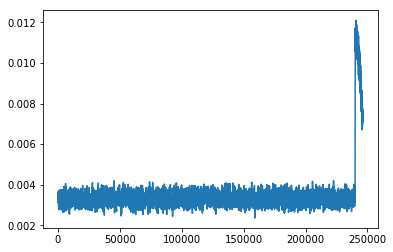

In [29]:
plt.plot(CNF.AccY.rolling(window = 100, center = False).std())

Определим функции для определения параметров:

In [5]:
def g_phi(phi, h, a, e2):
    g = 9.78030 * (1 - 2 * h / a + 3 * e2 * sin(phi) ** 2 / 4);
    return g